In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import autoencoder_train
import network
import utils

In [2]:
datadir = "/home/cjw/disk2cjw/Data/cyto/ChannelOne"
#datadir = "/home/cjw/disk2cjw/Data/yeast/"
mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/home/cjw/disk2cjw/Data/cyto/ChannelOne/Fish5_ice_21.tif.mm', '/home/cjw/disk2cjw/Data/cyto/ChannelOne/Fish5_13.tif.mm', '/home/cjw/disk2cjw/Data/cyto/ChannelOne/Fish6_CCB_16.tif.mm', '/home/cjw/disk2cjw/Data/cyto/ChannelOne/Fish6_15.tif.mm', '/home/cjw/disk2cjw/Data/cyto/ChannelOne/Fish5_CCB_14.tif.mm', '/home/cjw/disk2cjw/Data/cyto/ChannelOne/Fish6_ice_22.tif.mm']
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
60000


dict_keys(['Fish5_ice_21.tif.mm', 'Fish5_13.tif.mm', 'Fish6_CCB_16.tif.mm', 'Fish6_15.tif.mm', 'Fish5_CCB_14.tif.mm', 'Fish6_ice_22.tif.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000
10000
10000
10000


Encoder True
[<tf.Tensor 'Placeholder:0' shape=(?, 64, 64, 1) dtype=float32>, <tf.Tensor 'dropout/mul:0' shape=(?, 32, 32, 64) dtype=float32>, <tf.Tensor 'dropout_1/mul:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'dropout_2/mul:0' shape=(?, 8, 8, 256) dtype=float32>, <tf.Tensor 'dropout_3/mul:0' shape=(?, 4, 4, 512) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 128), dtype=float32)
isize:  4 64
[<tf.Tensor 'dropout_4/mul:0' shape=(?, 8192) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 4, 4, 512) dtype=float32>, <tf.Tensor 'dropout_5/mul:0' shape=(?, 8, 8, 256) dtype=float32>, <tf.Tensor 'dropout_6/mul:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'dropout_7/mul:0' shape=(?, 32, 32, 64) dtype=float32>] Tensor("decoder_out/BiasAdd:0", shape=(?, 64, 64, 1), dtype=float32)
Epoch:  0 Iteration:  0 Loss:  7.13457


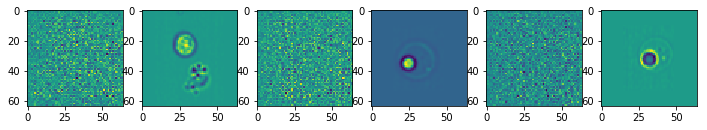

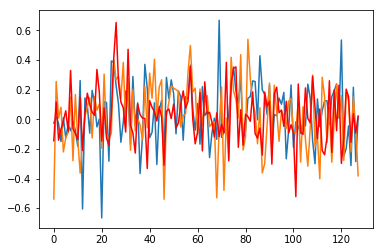

Epoch:  1 Iteration:  0 Loss:  4.50786


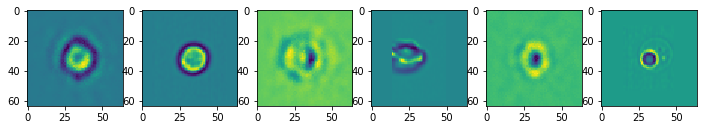

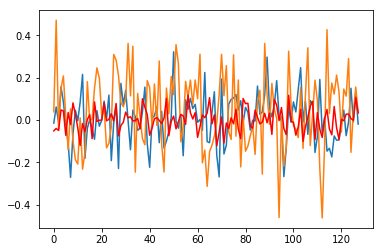

Epoch:  2 Iteration:  0 Loss:  3.01505


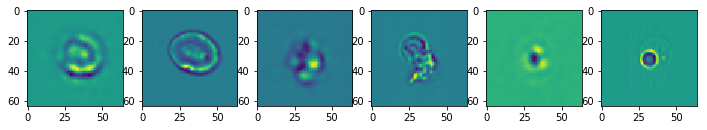

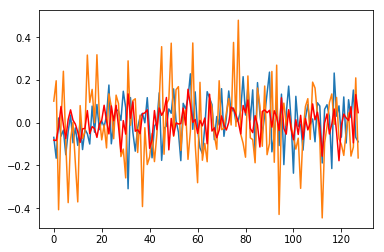

Epoch:  3 Iteration:  0 Loss:  2.51049


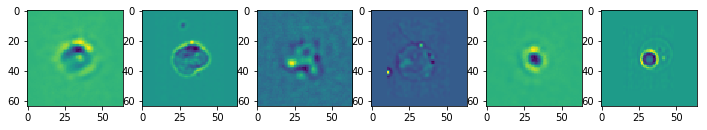

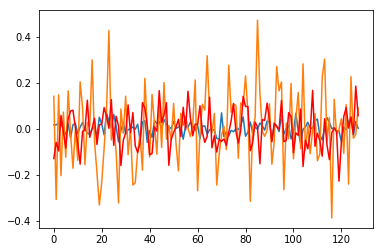

Epoch:  4 Iteration:  0 Loss:  2.26353


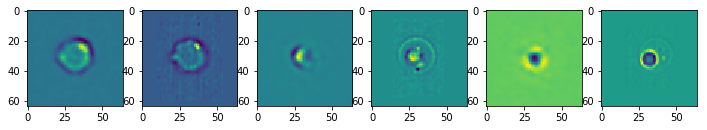

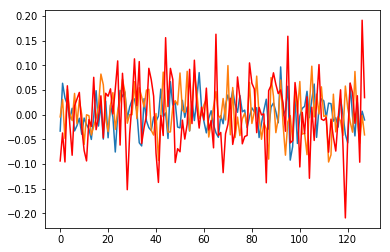

Epoch:  5 Iteration:  0 Loss:  2.05466


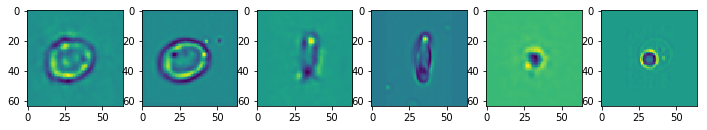

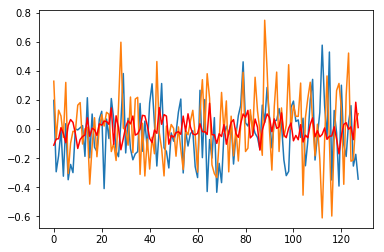

Epoch:  6 Iteration:  0 Loss:  1.92508


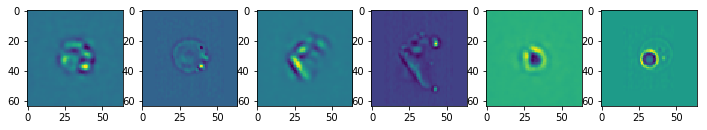

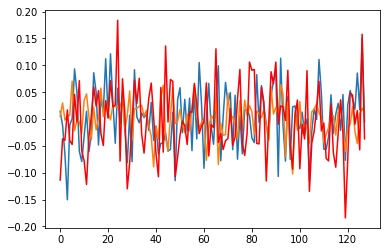

Epoch:  7 Iteration:  0 Loss:  1.80855


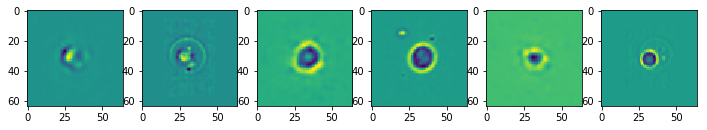

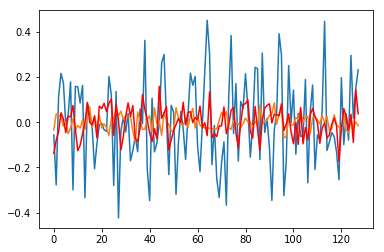

Epoch:  8 Iteration:  0 Loss:  1.74519


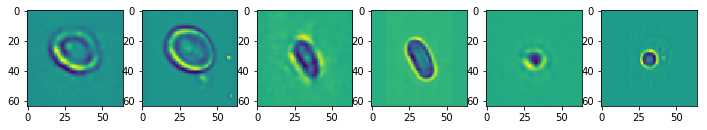

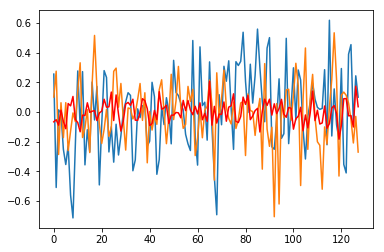

Epoch:  9 Iteration:  0 Loss:  1.66043


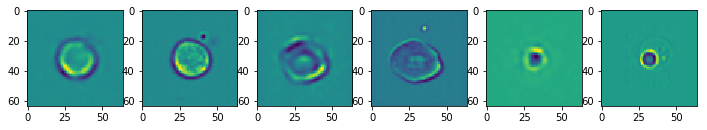

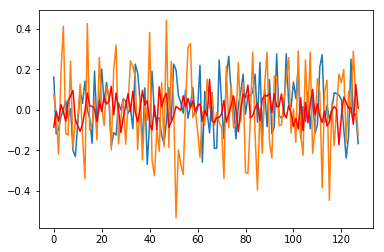

Epoch:  10 Iteration:  0 Loss:  1.59808


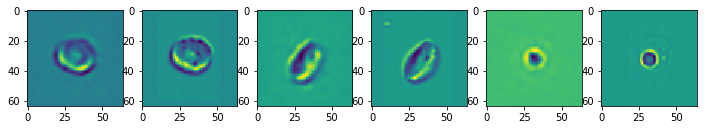

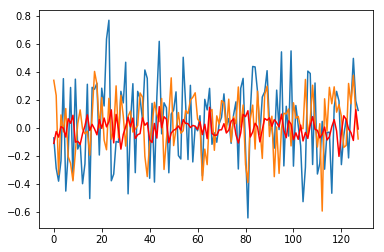

Epoch:  11 Iteration:  0 Loss:  1.60552


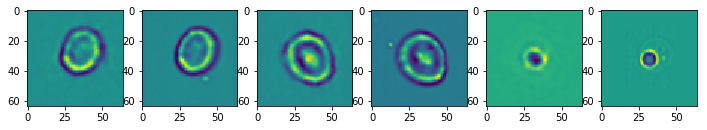

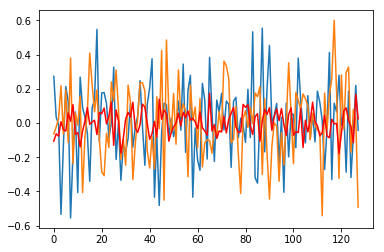

Epoch:  12 Iteration:  0 Loss:  1.54611


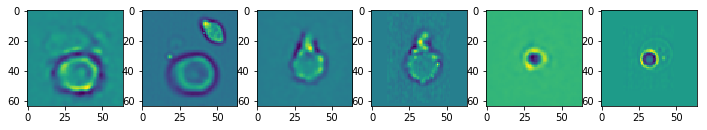

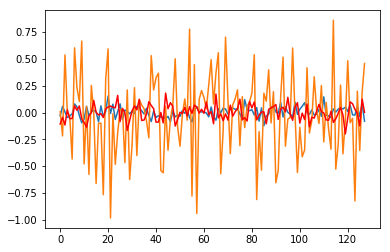

Epoch:  13 Iteration:  0 Loss:  1.51846


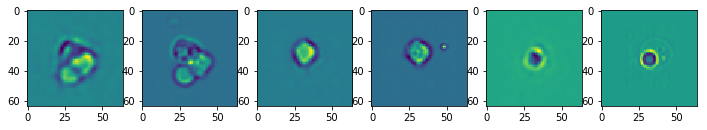

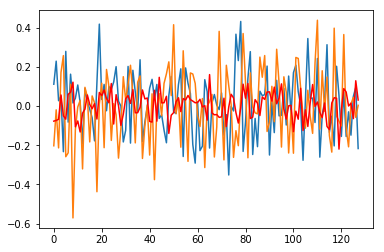

Epoch:  14 Iteration:  0 Loss:  1.46726


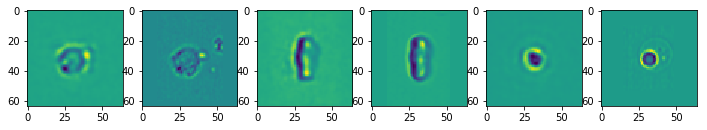

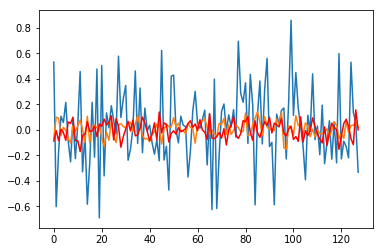

Epoch:  15 Iteration:  0 Loss:  1.42316


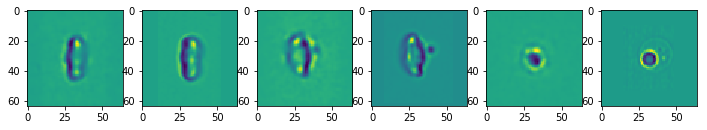

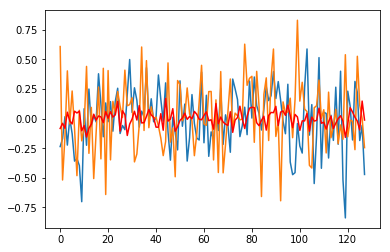

Epoch:  16 Iteration:  0 Loss:  1.39824


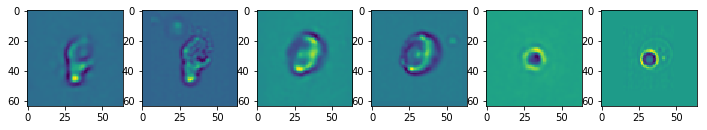

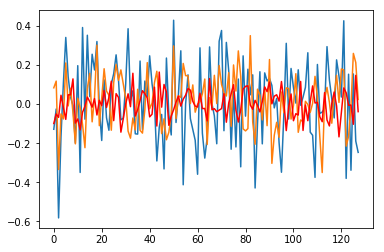

Epoch:  17 Iteration:  0 Loss:  1.37607


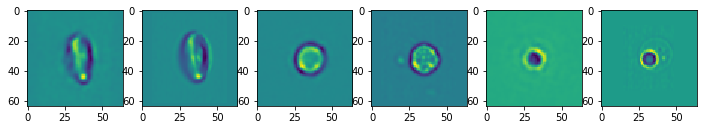

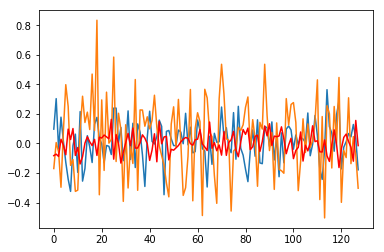

Epoch:  18 Iteration:  0 Loss:  1.36991


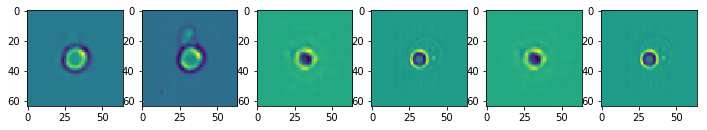

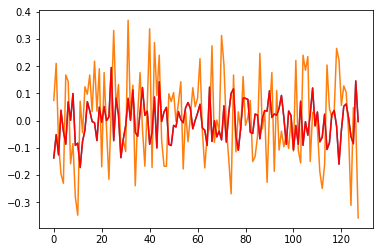

Epoch:  19 Iteration:  0 Loss:  1.36754


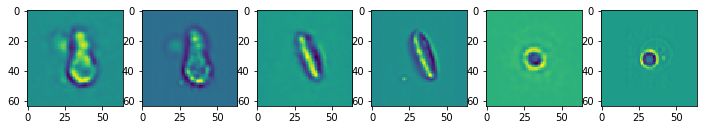

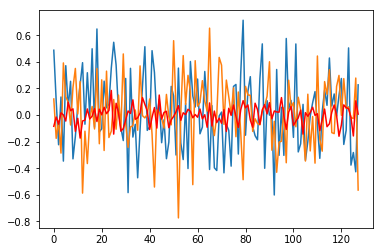

Epoch:  20 Iteration:  0 Loss:  1.33647


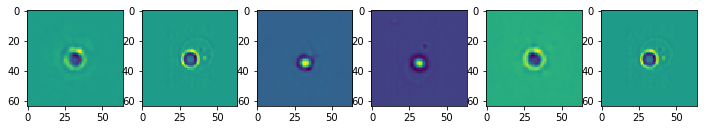

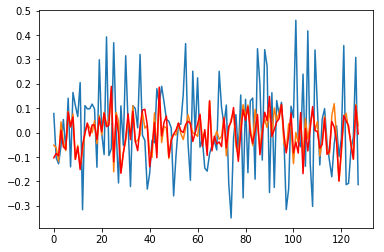

Epoch:  21 Iteration:  0 Loss:  1.29035


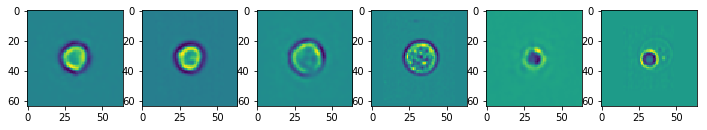

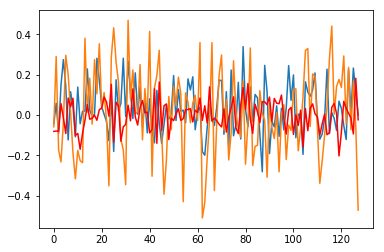

Epoch:  22 Iteration:  0 Loss:  1.26519


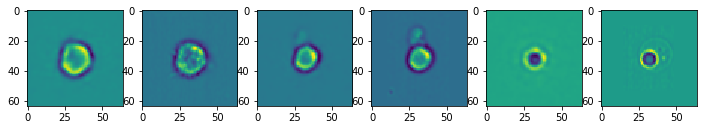

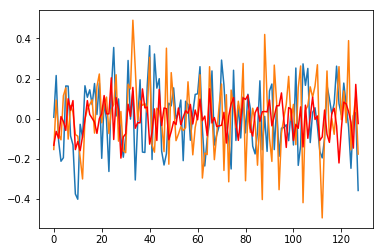

Epoch:  23 Iteration:  0 Loss:  1.26382


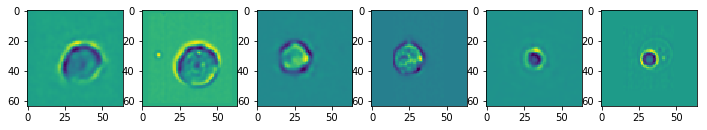

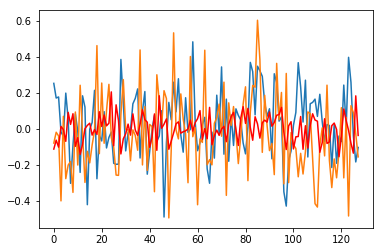

Epoch:  24 Iteration:  0 Loss:  1.23066


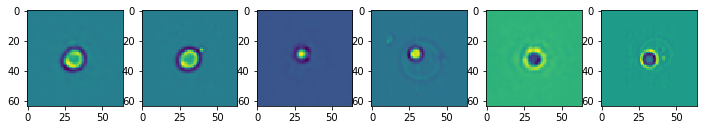

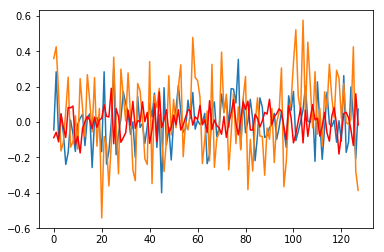

Epoch:  25 Iteration:  0 Loss:  1.23356


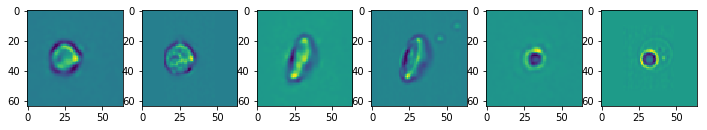

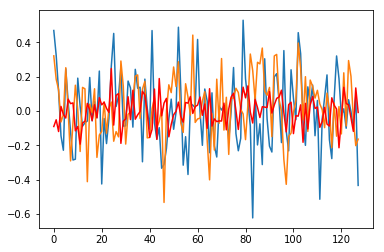

Epoch:  26 Iteration:  0 Loss:  1.21135


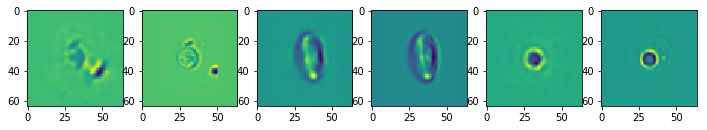

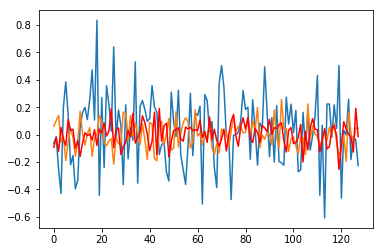

Epoch:  27 Iteration:  0 Loss:  1.16925


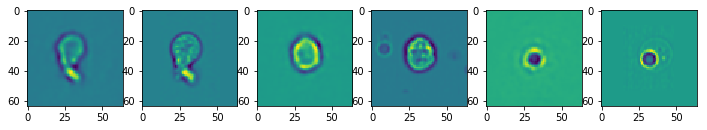

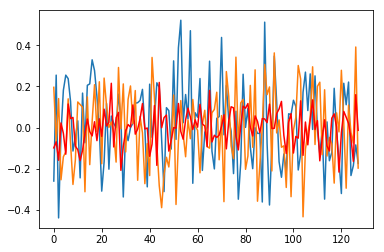

Epoch:  28 Iteration:  0 Loss:  1.15637


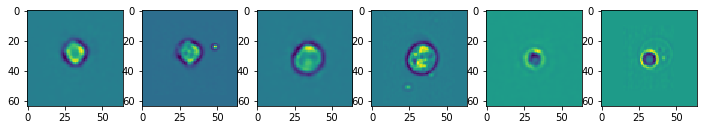

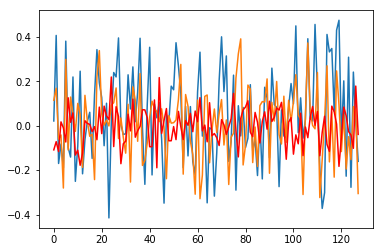

Epoch:  29 Iteration:  0 Loss:  1.15695


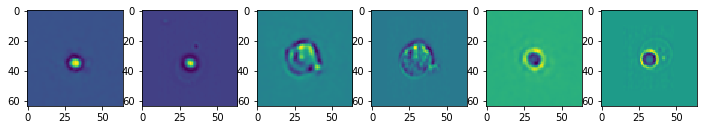

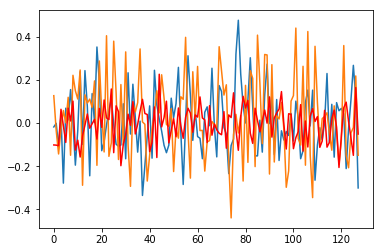

Epoch:  30 Iteration:  0 Loss:  1.15659


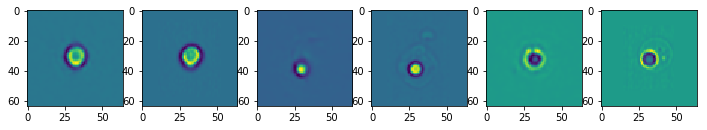

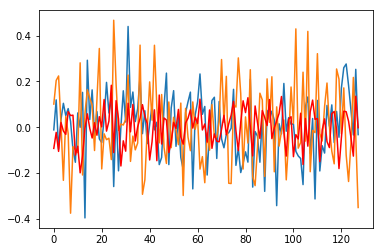

Epoch:  31 Iteration:  0 Loss:  1.11945


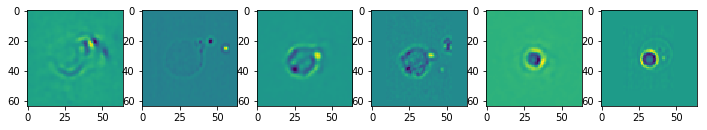

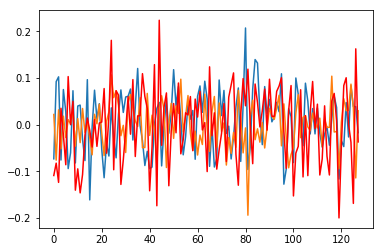

Epoch:  32 Iteration:  0 Loss:  1.14625


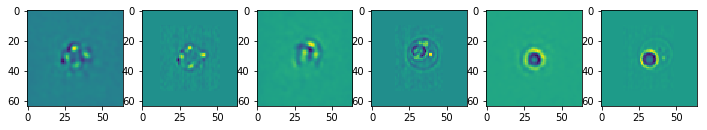

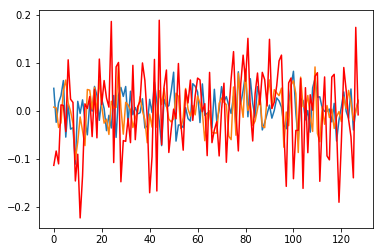

Epoch:  33 Iteration:  0 Loss:  1.11142


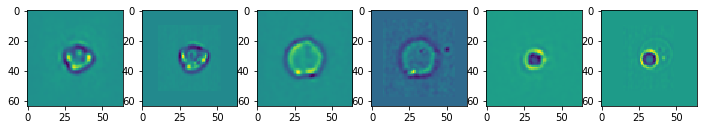

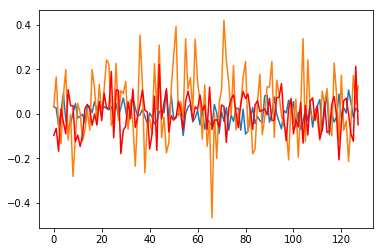

Epoch:  34 Iteration:  0 Loss:  1.08999


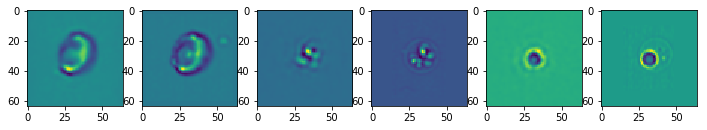

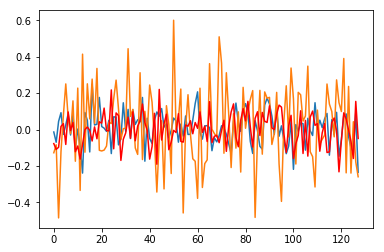

Epoch:  35 Iteration:  0 Loss:  1.08828


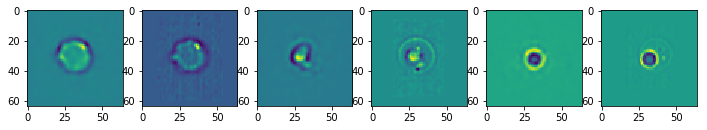

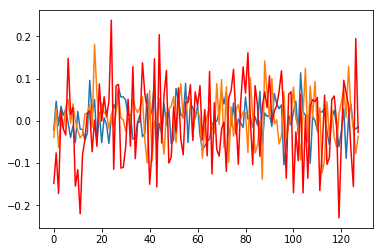

Epoch:  36 Iteration:  0 Loss:  1.08304


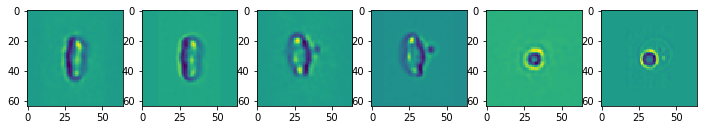

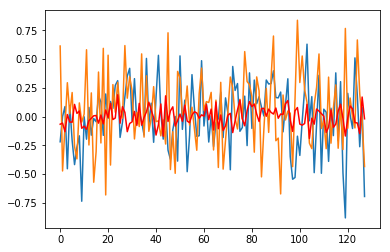

Epoch:  37 Iteration:  0 Loss:  1.06538


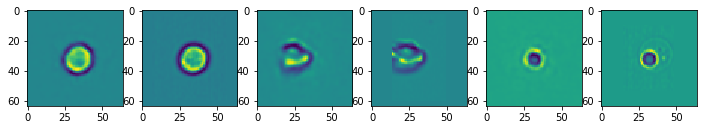

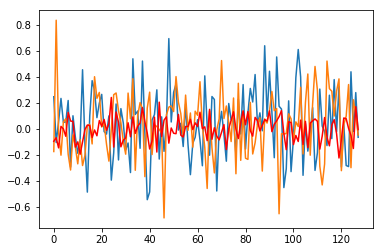

Epoch:  38 Iteration:  0 Loss:  1.06123


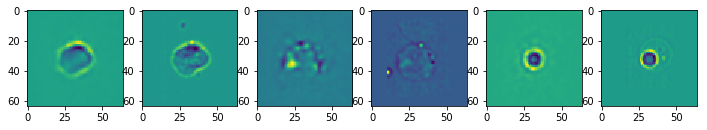

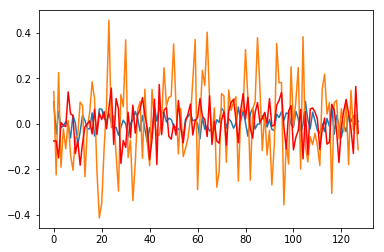

Epoch:  39 Iteration:  0 Loss:  1.05224


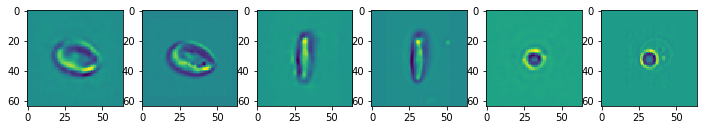

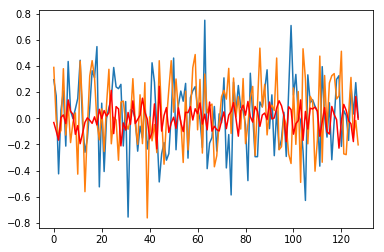

Epoch:  40 Iteration:  0 Loss:  1.02758


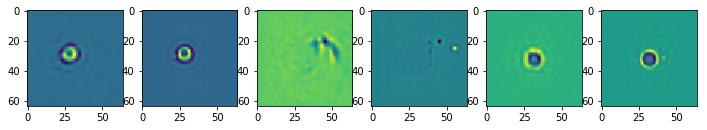

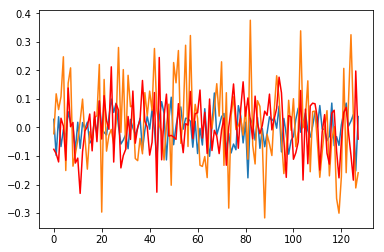

Epoch:  41 Iteration:  0 Loss:  1.03028


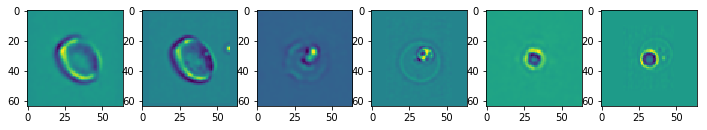

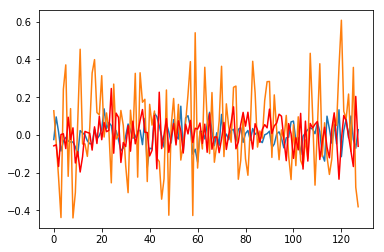

Epoch:  42 Iteration:  0 Loss:  1.01969


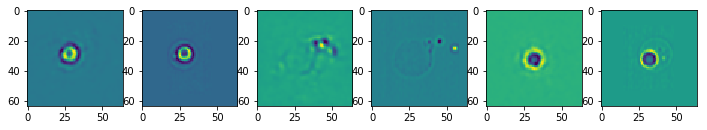

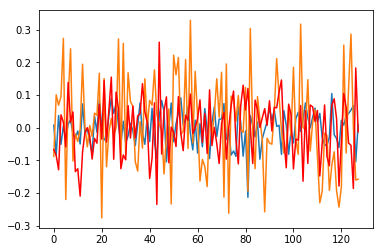

Epoch:  43 Iteration:  0 Loss:  1.0112


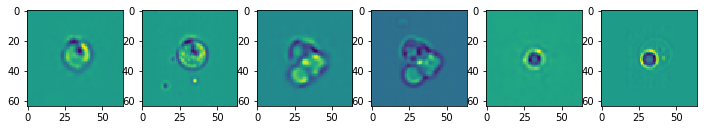

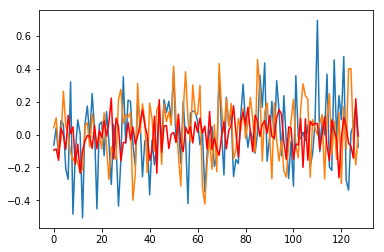

Epoch:  44 Iteration:  0 Loss:  0.994327


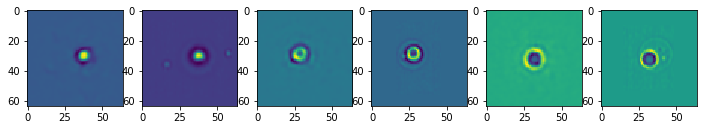

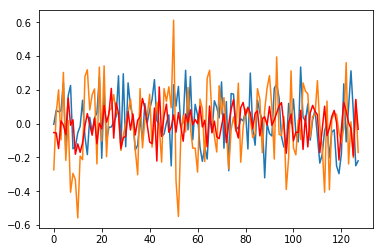

Epoch:  45 Iteration:  0 Loss:  1.019


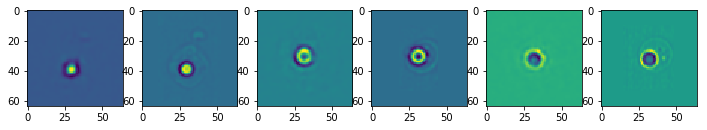

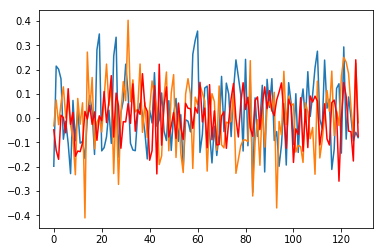

Epoch:  46 Iteration:  0 Loss:  0.994647


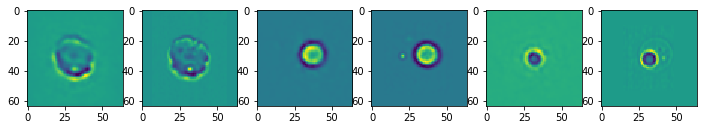

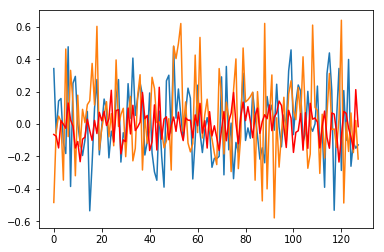

Epoch:  47 Iteration:  0 Loss:  0.978493


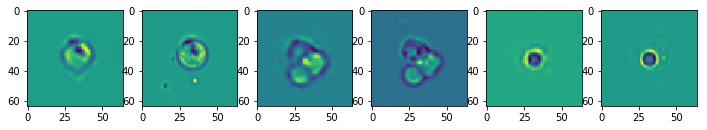

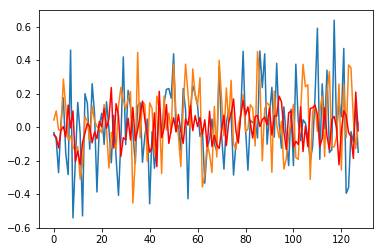

Epoch:  48 Iteration:  0 Loss:  0.960635


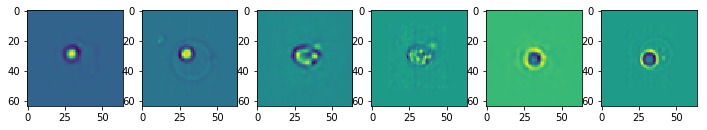

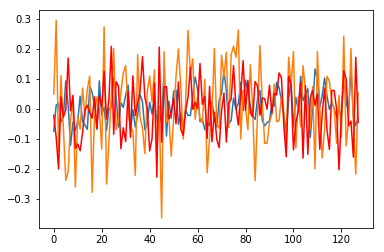

Epoch:  49 Iteration:  0 Loss:  0.993676


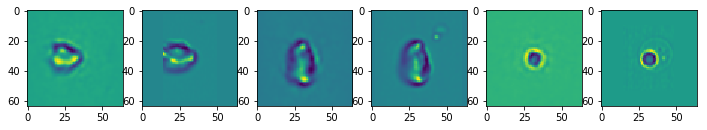

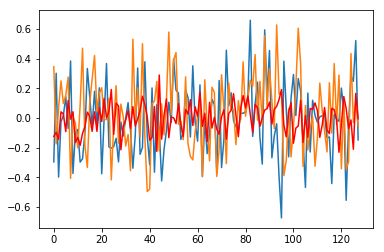

Epoch:  50 Iteration:  0 Loss:  0.954993


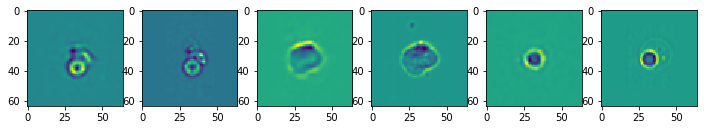

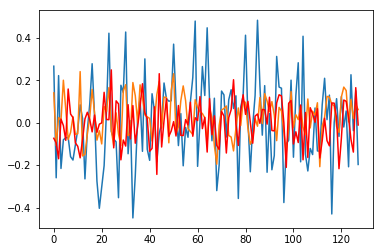

Epoch:  51 Iteration:  0 Loss:  0.945902


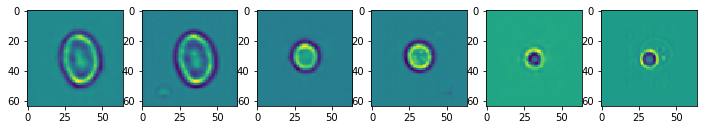

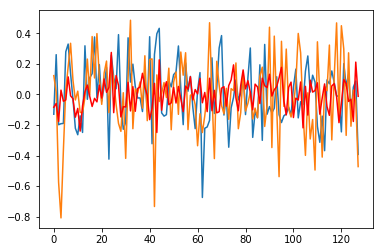

Epoch:  52 Iteration:  0 Loss:  0.975338


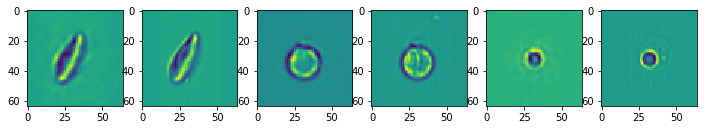

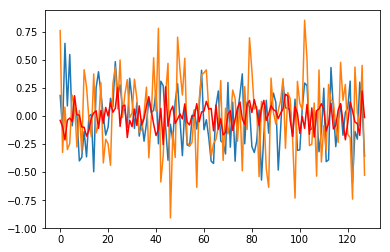

Epoch:  53 Iteration:  0 Loss:  0.955755


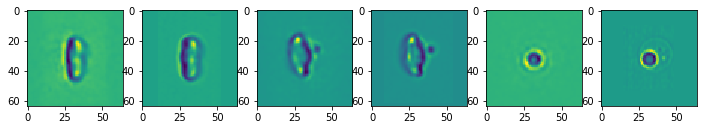

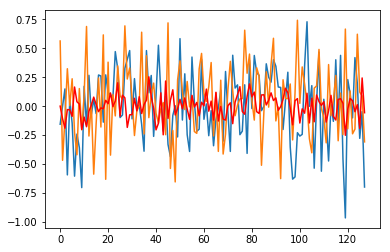

Epoch:  54 Iteration:  0 Loss:  0.935965


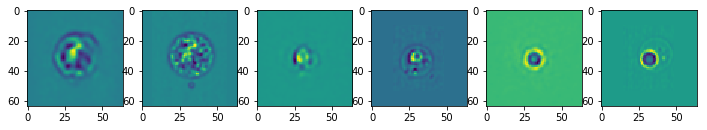

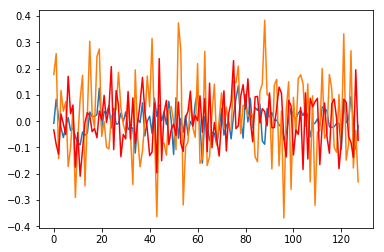

Epoch:  55 Iteration:  0 Loss:  0.926225


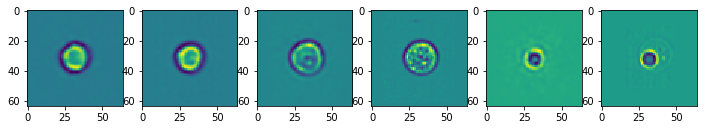

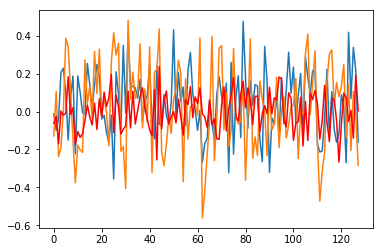

Epoch:  56 Iteration:  0 Loss:  0.907062


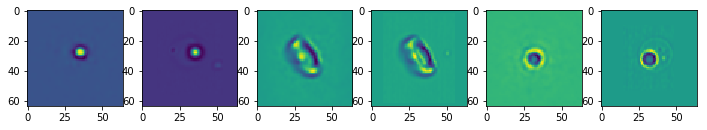

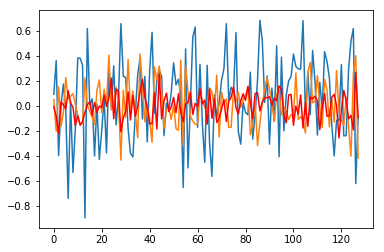

Epoch:  57 Iteration:  0 Loss:  0.926307


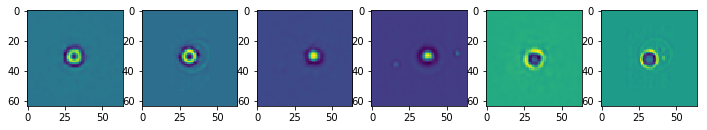

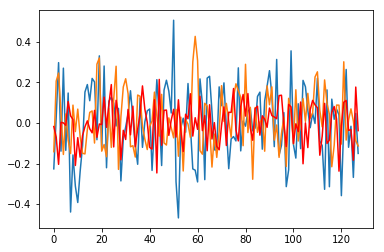

Epoch:  58 Iteration:  0 Loss:  0.934117


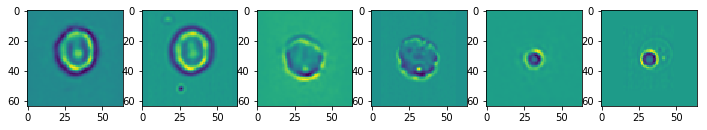

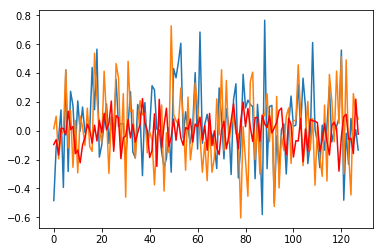

Epoch:  59 Iteration:  0 Loss:  0.90527


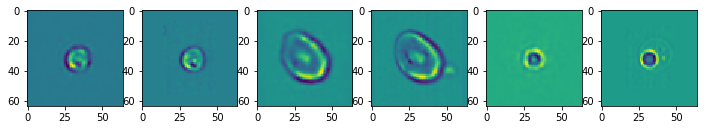

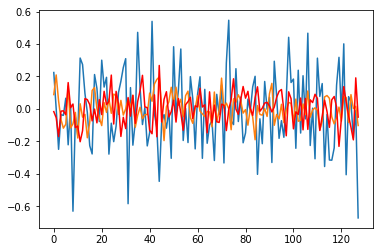

Done


In [4]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 64
p_height = 64
p_nchannels = 1
p_channels = [0]
p_nepochs = 60
p_batchsize = 128
p_learning_rate = 0.00005  #.00005
p_restore = False
p_latent_size = 128

# enc_sizes = [(8, 7), (16, 5), (32, 3), (64, 3)]
enc_sizes = [(64, 5), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = 0.75

params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

autoencoder_train.train(p_mmdict, p_df, params, 800)